In [160]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ranksums, mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor

from tabulate import tabulate

from ipynb.fs.full.preprocessing import preprocessing #import preprocessing class from preprocessing.ipynb

## Part 1: Initialize dfs, preprocessing

### 1a. DWT

In [71]:
#Part 1: initialize class, read in dataframe
prep_dwt = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/DWT.csv') #initialize class for DWT_8702
prep_dwt.df.head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.462234,-2.390083,-2.496001,-2.567832,-2.714483,-2.853814,-2.587323,-2.815667,-2.529468,-2.487444,...,-2.947384,-2.540375,-2.616557,-2.093166,-2.868000,-2.848592,-2.804433,-2.616103,-2.390560,1
1,-2.303016,-2.243269,-2.377895,-2.322088,-2.544736,-2.664095,-2.746503,-2.766540,-2.491645,-2.554321,...,-2.927361,-2.402814,-2.416895,-2.345415,-2.815763,-2.905354,-2.957433,-2.701947,-2.344442,1
2,-2.378106,-2.286579,-2.506946,-2.477289,-2.450869,-2.848399,-2.664014,-2.799355,-2.469628,-2.653850,...,-2.909338,-2.932407,-3.013070,-2.302342,-2.872999,-2.893005,-2.884964,-2.744103,-2.603805,1
3,-2.411076,-2.357384,-2.538120,-2.373840,-2.467567,-2.738331,-2.708997,-2.620310,-2.355342,-2.769357,...,-2.929341,-3.015539,-3.008299,-2.217575,-2.847411,-2.946254,-2.969480,-2.614736,-2.401006,1
4,-2.382939,-2.423288,-2.519401,-2.333251,-2.608106,-2.718791,-2.697185,-2.802862,-2.443454,-2.765421,...,-2.822273,-2.751273,-2.699928,-2.227029,-2.842104,-2.909700,-2.976055,-2.682061,-2.421083,1


In [72]:
#Part 2: label_df() function demo
dwt = prep_dwt.label_df()  #return full labeled dataframe with slope_1, slope_2, ..., slope_29, state
dwt.head()

,slope_1,slope_2,slope_3,slope_4,slope_5,slope_6,slope_7,slope_8,slope_9,slope_10,...,slope_21,slope_22,slope_23,slope_24,slope_25,slope_26,slope_27,slope_28,slope_29,state
0,-2.462234,-2.390083,-2.496001,-2.567832,-2.714483,-2.853814,-2.587323,-2.815667,-2.529468,-2.487444,...,-2.947384,-2.540375,-2.616557,-2.093166,-2.868000,-2.848592,-2.804433,-2.616103,-2.390560,1
1,-2.303016,-2.243269,-2.377895,-2.322088,-2.544736,-2.664095,-2.746503,-2.766540,-2.491645,-2.554321,...,-2.927361,-2.402814,-2.416895,-2.345415,-2.815763,-2.905354,-2.957433,-2.701947,-2.344442,1
2,-2.378106,-2.286579,-2.506946,-2.477289,-2.450869,-2.848399,-2.664014,-2.799355,-2.469628,-2.653850,...,-2.909338,-2.932407,-3.013070,-2.302342,-2.872999,-2.893005,-2.884964,-2.744103,-2.603805,1
3,-2.411076,-2.357384,-2.538120,-2.373840,-2.467567,-2.738331,-2.708997,-2.620310,-2.355342,-2.769357,...,-2.929341,-3.015539,-3.008299,-2.217575,-2.847411,-2.946254,-2.969480,-2.614736,-2.401006,1
4,-2.382939,-2.423288,-2.519401,-2.333251,-2.608106,-2.718791,-2.697185,-2.802862,-2.443454,-2.765421,...,-2.822273,-2.751273,-2.699928,-2.227029,-2.842104,-2.909700,-2.976055,-2.682061,-2.421083,1


In [73]:
#Part 3: Fisher's
dwt_filtered = prep_dwt.fishers() #windows with highest Fisher's criterion values + state, default 5 features
dwt_filtered.head()

,slope_6,slope_29,slope_4,slope_11,slope_28,state
0,-2.853814,-2.390560,-2.567832,-2.409633,-2.616103,1
1,-2.664095,-2.344442,-2.322088,-2.428556,-2.701947,1
2,-2.848399,-2.603805,-2.477289,-2.089429,-2.744103,1
3,-2.738331,-2.401006,-2.373840,-1.990729,-2.614736,1
4,-2.718791,-2.421083,-2.333251,-1.712213,-2.682061,1


In [74]:
dwt.state.value_counts() #verify number of cases and controls (162/91)

state
1    162
0     91
Name: count, dtype: int64

### 1b. Wang

In [75]:
#Part 1
prep_wang = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/Wang.csv') #initialize class for DWT_8702

#Part 2
wang = prep_wang.label_df()

#Part 3
wang_filtered = prep_wang.fishers()
wang_filtered.head()

,slope_6,slope_27,slope_29,slope_17,slope_25,state
0,-1.947008,-1.805645,-1.521289,-1.648877,-1.908993,1
1,-1.787114,-1.857716,-1.443023,-1.771526,-1.781598,1
2,-1.935820,-1.848338,-1.619408,-1.778519,-1.853294,1
3,-1.857946,-1.857774,-1.516554,-1.685034,-1.783911,1
4,-1.834842,-1.861765,-1.478096,-1.663361,-1.813565,1


In [76]:
wang.state.value_counts() #verify number of cases and controls (162/91)

state
1    162
0     91
Name: count, dtype: int64

### 1c. Jones

In [77]:
#Part 1
prep_jones = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/Jones.csv') #initialize class for DWT_8702

#Part 2
jones = prep_jones.label_df()

#Part 3
jones_filtered = prep_jones.fishers()
jones_filtered.head()

,slope_6,slope_28,slope_20,slope_5,slope_24,state
0,-2.046103,-1.715725,-2.405696,-2.220889,-1.513295,1
1,-2.170008,-1.664508,-2.410726,-2.238927,-1.583453,1
2,-2.090433,-1.749535,-2.506319,-2.308864,-1.626415,1
3,-2.089851,-1.672430,-2.421255,-2.228566,-1.655143,1
4,-2.041431,-1.726858,-2.494645,-2.240090,-1.578360,1


In [84]:
jones.state.value_counts() #verify number of cases and controls (162/91)

state
1    162
0     91
Name: count, dtype: int64

Although Ovarian 4-3-02 has an equal number of cases and controls (i.e., 𝑁1 = 100 controls and 𝑁2 = 100 cases), Ovarian 8-7-02 has 𝑁1 = 91 controls 𝑁2 = 162 cases. To avoid bias due to the imbalance in group sizes for Ovarian 8-7-02, 91 of the 162 cases are randomly selected to match the number of controls prior to randomly determining the training and test sets.

In [79]:
#store dwt, wang, and jones dataframes in memory
%store -r dwt
%store -r wang 
%store -r jones

no stored variable or alias dwt
no stored variable or alias wang
no stored variable or alias jones


## Part 2. EDA

### 2a. Correlation Coefficient Matrix

Text(0.5, 1.0, 'Correlation Coefficient Matrix for DWT Method Slopes')

Text(0.5, 1.0, 'Correlation Coefficient Matrix for Wang Method Slopes')

Text(0.5, 1.0, 'Correlation Coefficient Matrix for Jones Method Slopes')

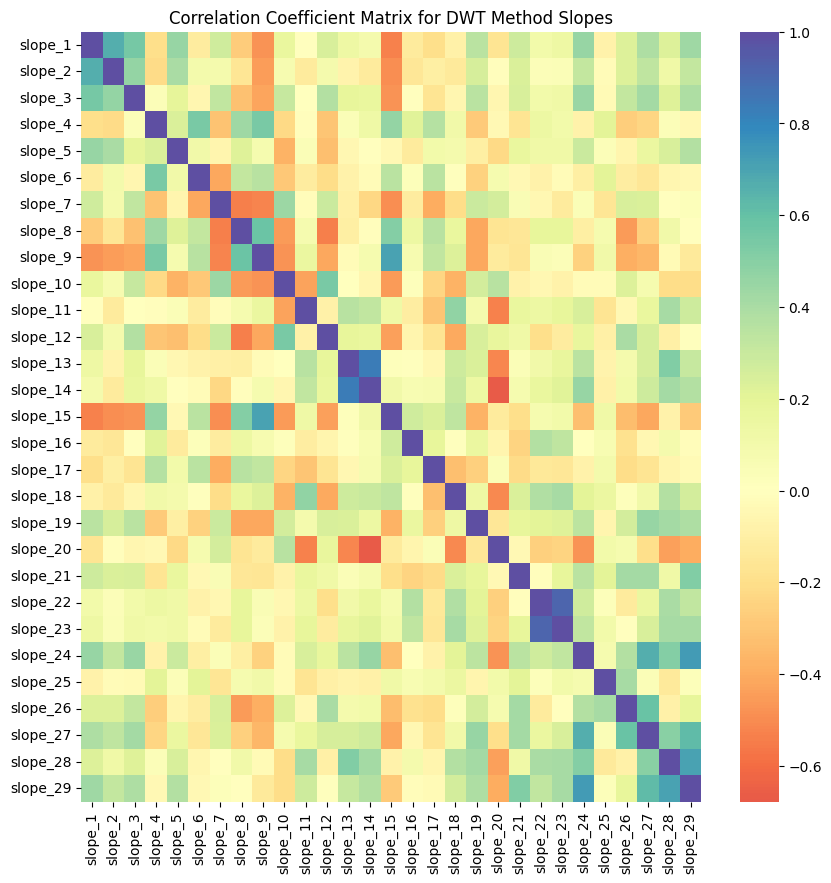

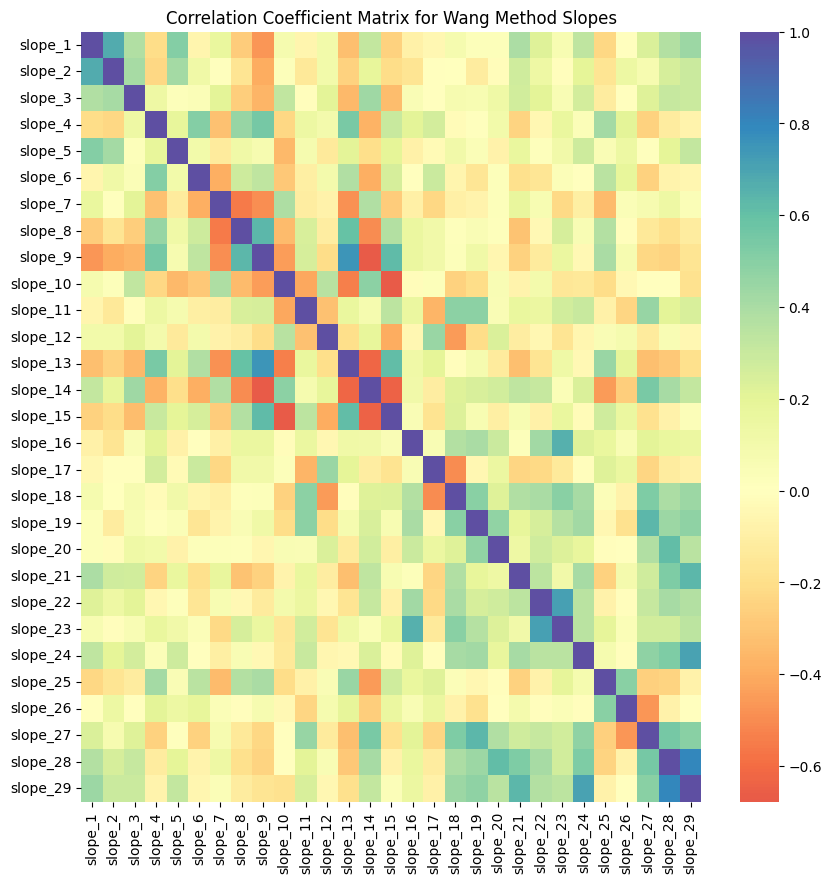

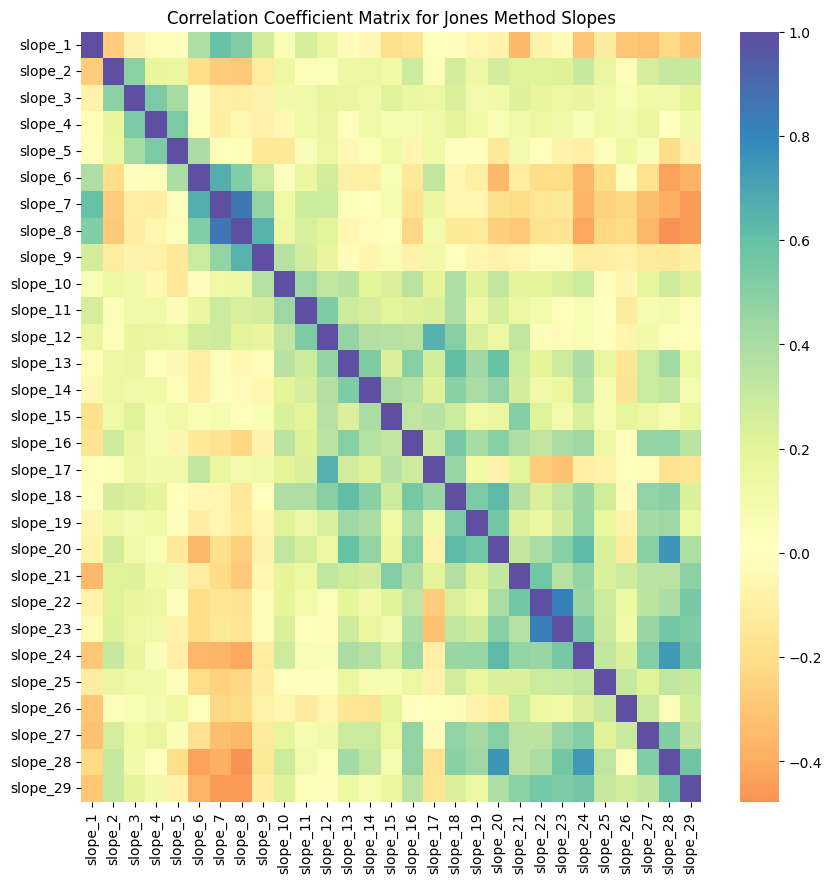

In [81]:
def corr_map(df=dwt, file_name='DWT'): #default fx runs dwt8 / DWT_8702

    df = df.loc[:, df.columns != 'state'] #remove state/supervisor column, df is features only
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 10))
    map = sns.heatmap(corr_matrix, annot=False, center=0, cmap="Spectral").set_title("Correlation Coefficient Matrix for " + file_name + " Method Slopes")
    
    return map

display(corr_map(df=dwt, file_name='DWT')) #run fx with dwt
display(corr_map(df=wang, file_name='Wang')) #run fx with wang
display(corr_map(df=jones, file_name='Jones')) #run fx with wang

### 2b. Variance Inflation Factors for Multicollinearity Detection

In [83]:
df_names = {'dwt': 'DWT', 
            'wang': 'Wang',
            'jones': 'Jones'
            } 

def vif(dfs = [dwt, wang, jones]): 

    for i, df in enumerate(dfs):
        
        df = df.loc[:, df.columns != 'state'] #remove state/supervisor column, df is features only
        
        vif_data = pd.DataFrame() #initialize dataframe for VIF values
        vif_data["feature_"+str(df_names[list(df_names.keys())[i]])] = df.columns #row for each feature
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

        print(vif_data)

vif() #demo with WPD_Wang_8702 file

   feature_DWT           VIF
0      slope_1   2336.750232
1      slope_2   2005.935714
2      slope_3   3420.935089
3      slope_4   1589.912227
4      slope_5   1378.838219
5      slope_6   2435.855732
6      slope_7   2234.657882
7      slope_8   4863.307851
8      slope_9   3219.558812
9     slope_10   3185.522650
10    slope_11    508.180275
11    slope_12    710.107008
12    slope_13   1307.667173
13    slope_14   3381.933984
14    slope_15   1212.642337
15    slope_16    399.576597
16    slope_17    454.546431
17    slope_18    989.285203
18    slope_19    938.973584
19    slope_20   2861.212647
20    slope_21   2901.686482
21    slope_22   3837.004678
22    slope_23   2565.473701
23    slope_24    361.996919
24    slope_25   1770.975915
25    slope_26  14531.729844
26    slope_27   9732.845635
27    slope_28   1362.154120
28    slope_29    477.886456
   feature_Wang          VIF
0       slope_1  1190.796970
1       slope_2  1276.160952
2       slope_3  2560.682225
3       slope_

### Probability distribution of selected features

In [140]:
def plot_prdist(df, filtered_df, name):
    cols = list(filtered_df.columns)
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle("Probability Distribution of Top Five Features by Fisher's Criterion for " + name + " Method")

    for i, ax in enumerate(axs.flat[:-1]):
        sns.histplot(data=df, x=cols[i], hue='state', stat='probability', kde='True', ax=ax)
        list(dwt_filtered.columns)

    fig.delaxes(axs[1,2]) #delete last subplot since we have 5 features

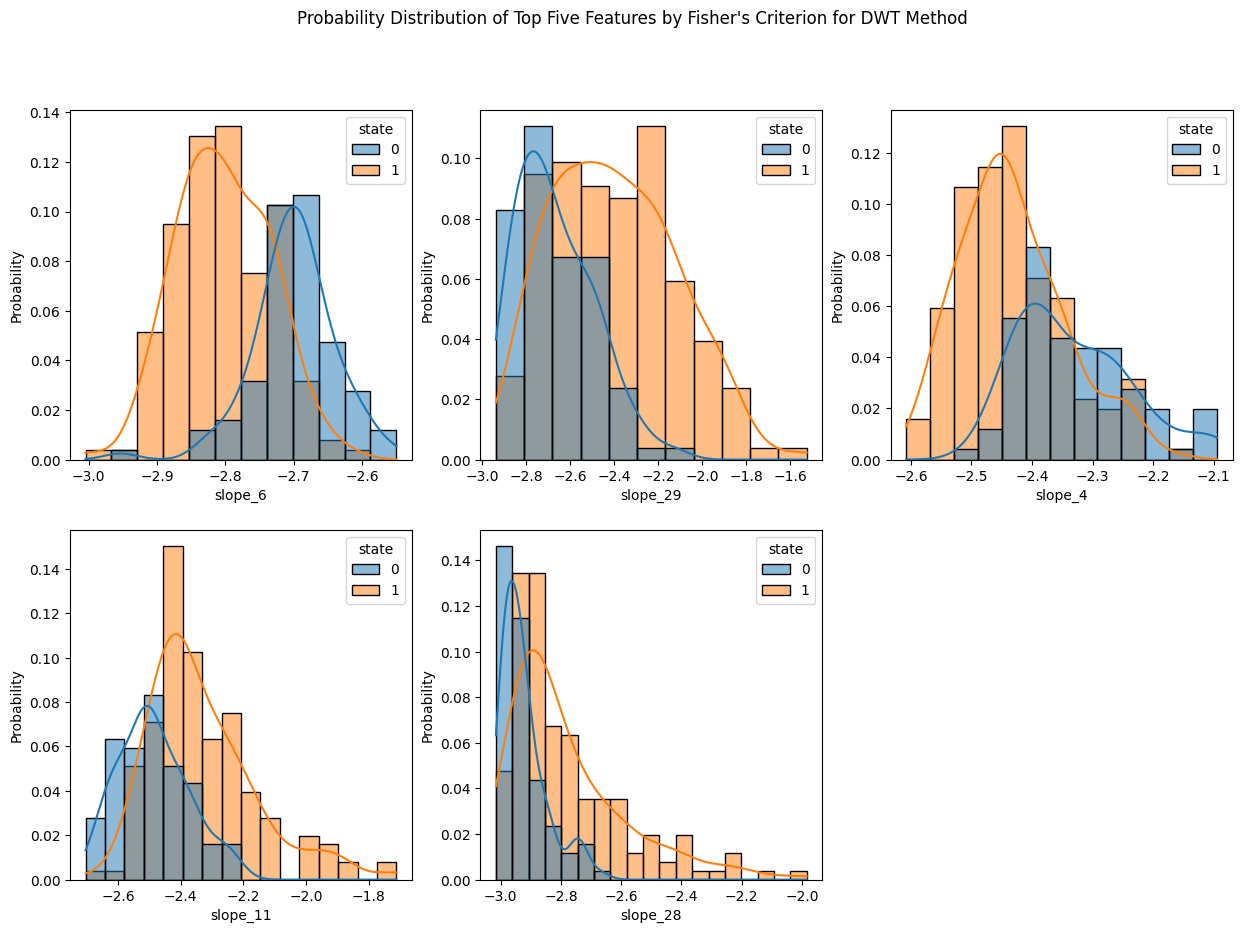

In [141]:
plot_prdist(dwt, dwt_filtered, 'DWT')

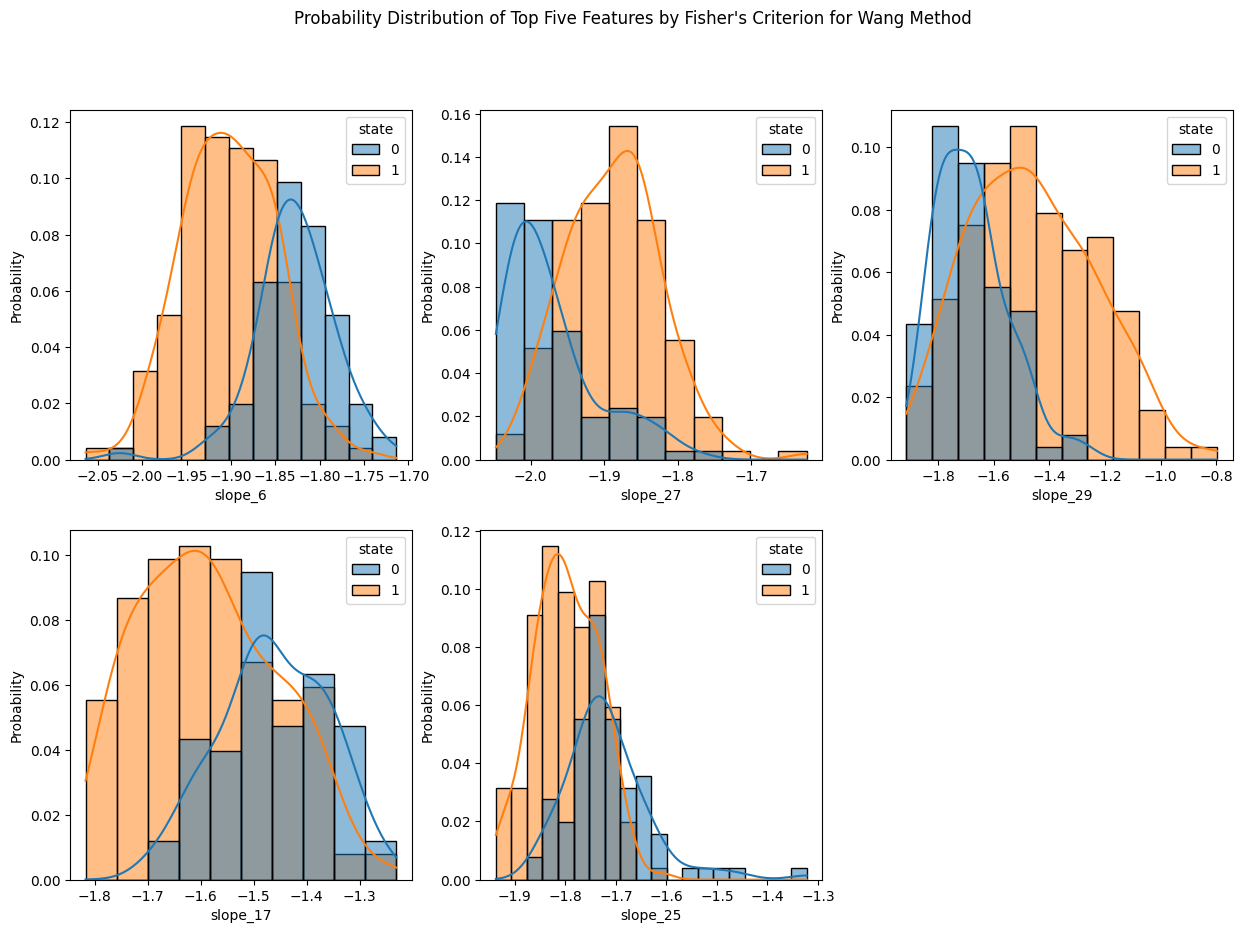

In [142]:
plot_prdist(wang, wang_filtered, 'Wang')

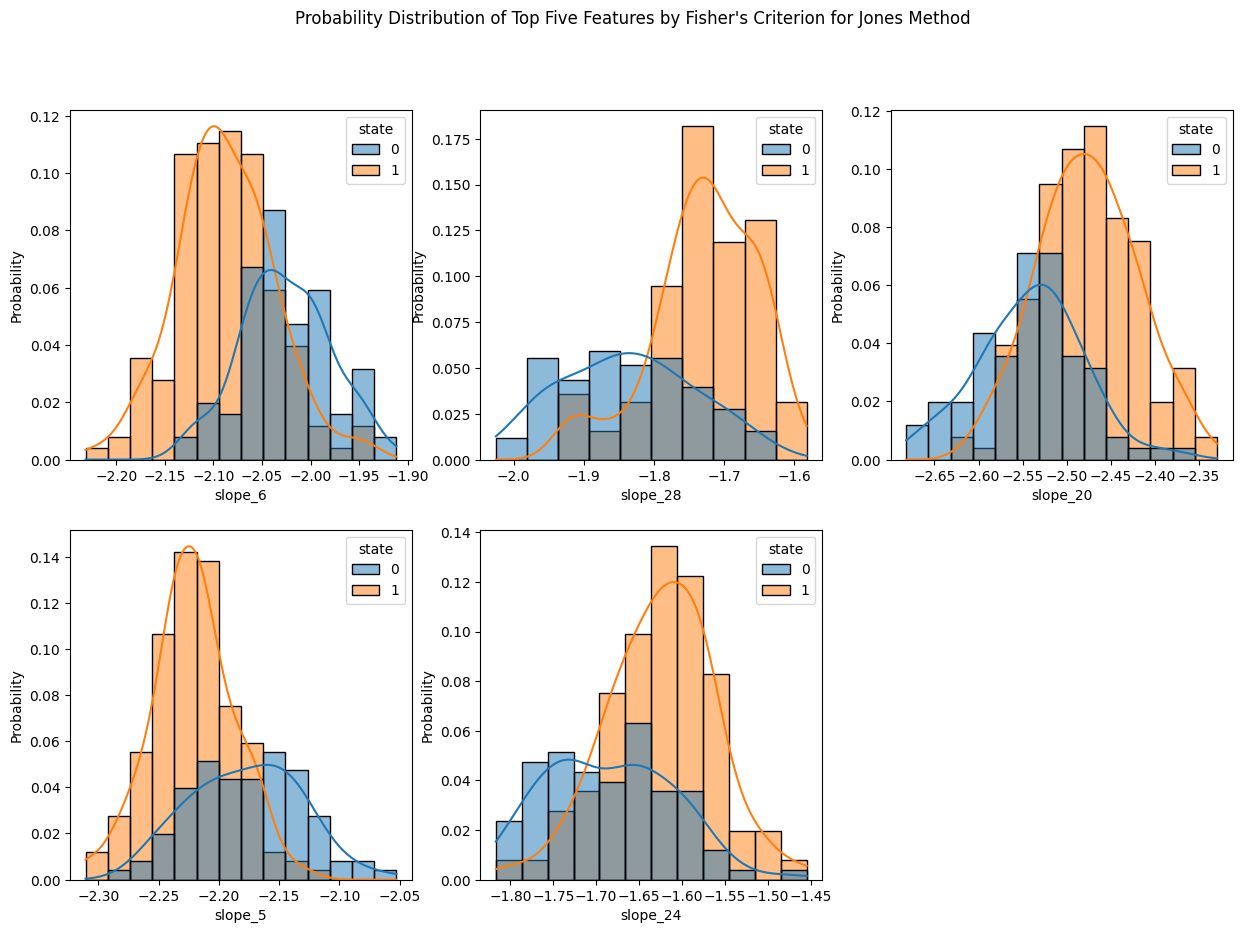

In [144]:
plot_prdist(jones, jones_filtered, 'Jones')

### Wilcoxon Rank-Sum Test

non-parametric version of the two-sample t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

In [145]:
x = dwt['slope_6'][dwt['state'] == 0] #controls for slope_6 feature
y = dwt['slope_6'][dwt['state'] == 1] #cases for slope_6 feature

ranksums(x, y) 

RanksumsResult(statistic=9.930102403735122, pvalue=3.07939131215838e-23)

In [180]:
def wilcoxon_table(df, filtered_df, name):
    cols = list(filtered_df.columns)
    vals = []

    for i, col in enumerate(cols[:-1]):
        x = df[col][df['state'] == 0] #controls
        y = df[col][df['state'] == 1] #cases

        res = ranksums(x, y)

        vals.append([col, (res.pvalue)])

    print("Wilcoxon Rank-Sum Test for Top Five Features by Fisher's Criterion for " + name + " Method")
    print(tabulate(vals, headers=['Feature', 'p-value']))

In [181]:
wilcoxon_table(dwt, dwt_filtered, 'DWT')

Wilcoxon Rank-Sum Test for Top Five Features by Fisher's Criterion for DWT Method
Feature        p-value
---------  -----------
slope_6    3.07939e-23
slope_29   5.38141e-14
slope_4    2.19463e-14
slope_11   6.6972e-14
slope_28   1.48518e-14


In [182]:
wilcoxon_table(wang, wang_filtered, 'Wang')

Wilcoxon Rank-Sum Test for Top Five Features by Fisher's Criterion for Wang Method
Feature        p-value
---------  -----------
slope_6    1.79317e-22
slope_27   1.03805e-18
slope_29   7.24662e-15
slope_17   1.02813e-12
slope_25   4.88905e-14


In [183]:
wilcoxon_table(jones, jones_filtered, 'Jones')

Wilcoxon Rank-Sum Test for Top Five Features by Fisher's Criterion for Jones Method
Feature        p-value
---------  -----------
slope_6    2.02079e-17
slope_28   1.00137e-16
slope_20   2.81717e-14
slope_5    3.84378e-13
slope_24   6.35053e-10
